In [26]:
from sysdata.sim.csv_futures_sim_data import csvFuturesSimData
from paper.systems.simplesystem import simplesystem
import pandas as pd
import numpy as np
from seaborn import heatmap
import matplotlib.pyplot as plt
from sysquant.estimators.diversification_multipliers import diversification_mult_single_period
from sysquant.optimisation.weights import portfolioWeights
from syslogdiag.log_to_screen import logtoscreen

log = logtoscreen('csvFuturesSimData')
log.set_logging_level('close eye')
# data = csvFuturesSimData()
data =  csvFuturesSimData(csv_data_paths=dict(
            csvFuturesAdjustedPricesData='ctse.data.adjusted_prices_csv',
            csvFuturesMultiplePricesData='ctse.data.multiple_prices_csv',
            csvFuturesInstrumentData='ctse.data.csvconfig'
    ), log=log)
system = simplesystem(
    data,
    'paper.systems.china.yaml')
data = system.data

2022-11-21 15:52:51 {'type': 'base_system', 'stage': 'config'}  Adding config defaults


In [27]:
from paper.systems.rules.mac import mac
from paper.systems.rules.mac import ewmac

instrument_code = 'JD'
fast = 2
slow = 4 * fast

price = data.daily_prices(instrument_code)
forecast = mac(price, fast, slow)
forecast.columns = ['forecast']
forecast.to_csv('mac.csv')


price = data.daily_prices(instrument_code)
ewforecast = ewmac(price, fast, slow)
ewforecast.columns = ['ewforecast']
ewforecast.to_csv('ewmac.csv')

index
2014-01-02    0.000000
2014-01-03    0.000000
2014-01-06    0.000000
2014-01-07    0.000000
2014-01-08    0.000000
                ...   
2022-08-25    4.379132
2022-08-26    4.255249
2022-08-29    4.204389
2022-08-30    4.328556
2022-08-31    4.201489
Freq: B, Name: mac, Length: 2260, dtype: float64

index
2014-01-02    0.000000
2014-01-03    0.000000
2014-01-06    0.000000
2014-01-07    0.000000
2014-01-08    0.000000
                ...   
2022-08-25    2.628349
2022-08-26    2.504466
2022-08-29    2.453606
2022-08-30    2.577773
2022-08-31    2.450706
Freq: B, Name: ewmac, Length: 2260, dtype: float64

<AxesSubplot:xlabel='index'>

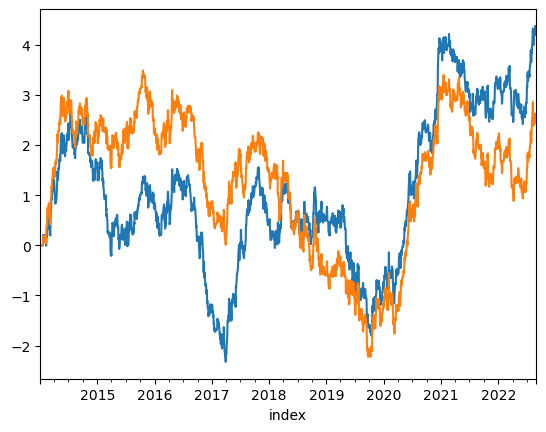

In [28]:
from systems.accounts.account_forecast import pandl_for_instrument_forecast
account = pandl_for_instrument_forecast(forecast=forecast, price = price)
ewaccount = pandl_for_instrument_forecast(forecast=ewforecast, price = price)

pl = account.curve().rename('mac')
ewpl = ewaccount.curve().rename('ewmac')
display(pl)
display(ewpl)
pl.plot()
ewpl.plot()

<AxesSubplot:>

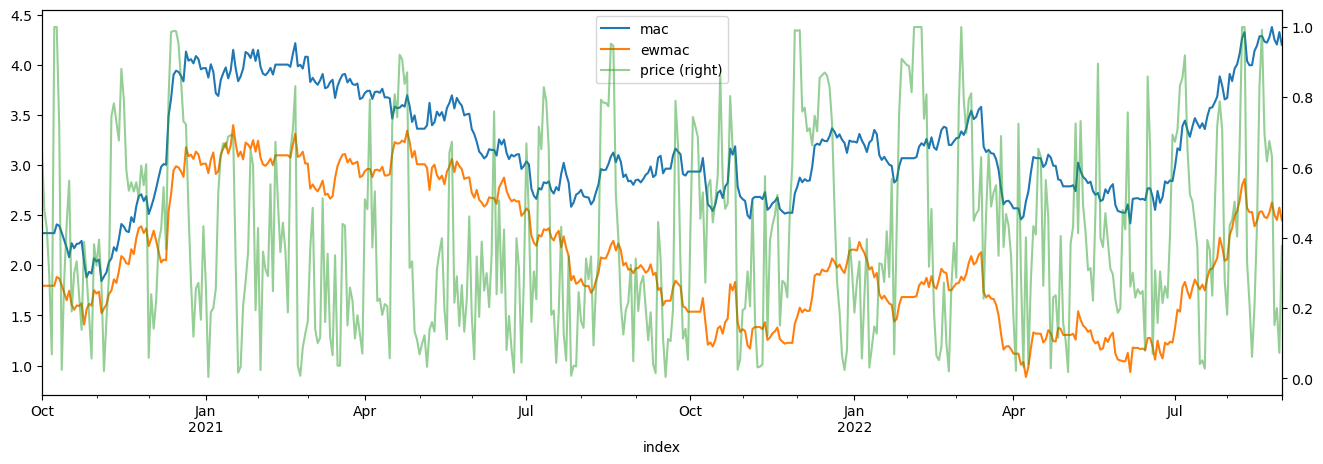

In [29]:
pl.tail(500).plot(legend=True, figsize=(16,5))
ewpl.tail(500).plot(legend=True)
# price.head(500).plot(legend=True, secondary_y=True)

from mdi import rolling_snr
snr = rolling_snr(price.ffill(), slow)
snr.tail(500).plot(legend=True, secondary_y=True, alpha=0.5)